# Plotting t-SNE for Amazon Fine Food Review Data

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn.manifold import TSNE

In [6]:
#Load the preprocessed dataset from the datsbase final.sqlite

conn = sqlite3.connect('../AmazonFineFoodReviews/final.sqlite')
final = pd.read_sql_query("""SELECT * From Reviews ORDER BY ProductId""", conn)

In [7]:
#Removing the index column from data

clean_data = final.drop(['index'], axis=1)
clean_data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,Positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,Positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...


In [98]:
# Create a new Dataframe using 10k postive and 10k negative reviews

positive_reviews = clean_data[clean_data['Score'] == 'Positive'].sample(n=10000)
negative_reviews = clean_data[clean_data['Score'] == 'Negative'].sample(n=10000)
rev_data = pd.concat((positive_reviews, negative_reviews), axis=0)

# Bag of Words

####  t-SNE plot using perplexity=30 and iterations=2000

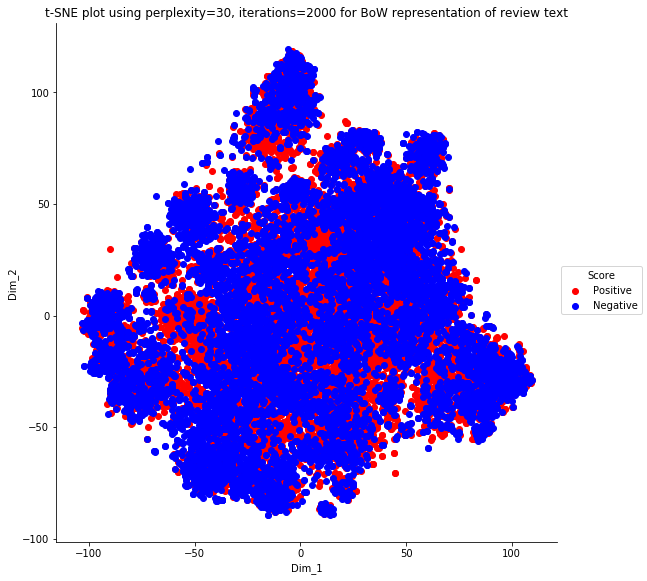

In [97]:
#Running count vectorizer on sample of 10000 reviews
count_vec = CountVectorizer()
trans_data = count_vec.fit_transform(rev_data['CleanedText'].values)

# Converting sparse representation into dense using TruncatedSVD
from sklearn.decomposition import TruncatedSVD

t_svd = TruncatedSVD(n_components=50, random_state=0)
dense_data = t_svd.fit_transform(trans_data)

# t-SNE plot for BoW(uni-gram)

from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, n_iter=2000)
tdata = model.fit_transform(dense_data)

tdata = np.vstack((tdata.T, rev_data['Score'])).T
tdata_df = pd.DataFrame(data=tdata, columns=('Dim_1', 'Dim_2', 'Score'))

#plot the t-SNE data using Seaborn

import seaborn as sns
d = {'color': ['r', 'b']}
sns.FacetGrid(tdata_df, hue_kws=d, hue='Score', size=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("t-SNE plot using perplexity=30, iterations=2000 for BoW representation of review text")
plt.show()

####  t-SNE plot using perplexity=15 and iterations=2000

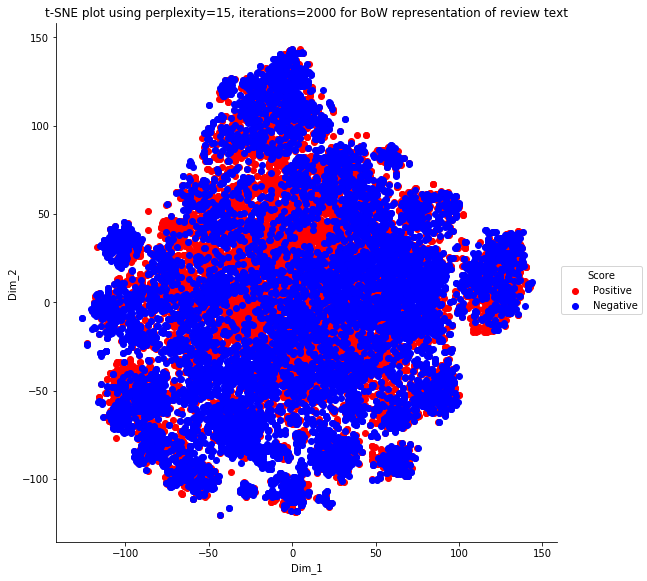

In [99]:
# t-SNE plot for BoW(uni-gram)

from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=15)
tdata = model.fit_transform(dense_data)

tdata = np.vstack((tdata.T, rev_data['Score'])).T
tdata_df = pd.DataFrame(data=tdata, columns=('Dim_1', 'Dim_2', 'Score'))

#plot the t-SNE data using Seaborn

import seaborn as sns
d = {'color': ['r', 'b']}
sns.FacetGrid(tdata_df, hue_kws=d, hue='Score', size=8).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("t-SNE plot using perplexity=15, iterations=2000 for BoW representation of review text")
plt.show()

### Bag of Words using bi-grams 

#### t-SNE plot using perplexity=15 and iterations=2000

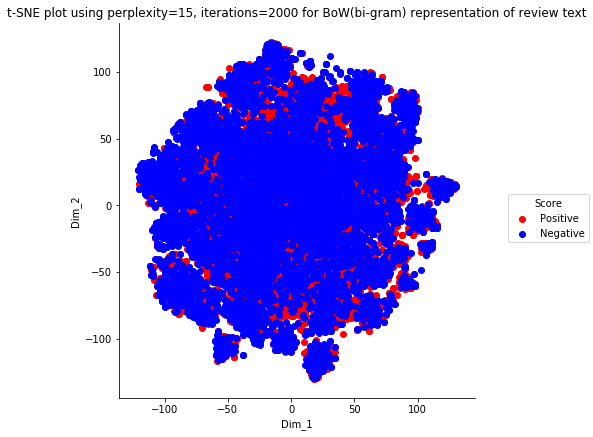

In [100]:
cnt_vec = CountVectorizer(ngram_range=(1,2))
tdata_bigram = cnt_vec.fit_transform(rev_data['CleanedText'].values)

#converting the sparse matrix representation using TruncatedSVD so we can feed it to t-SNE
#t-SNE doesn't work on sparse representation

t_svd = TruncatedSVD(n_components=50, random_state=0)
dense_bigram_data = t_svd.fit_transform(tdata_bigram)

#Standardizing the data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_data = std.fit_transform(dense_bigram_data)

# t-SNE plotting using the dense representation obtained above

tsne = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=15)
tdata = tsne.fit_transform(std_data)

tdata = np.vstack((tdata.T, rev_data['Score'])).T
tdata = pd.DataFrame(data=tdata, columns=('Dim_1', 'Dim_2', 'Score'))

d={'color':['r','b']}
sns.FacetGrid(tdata, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot using perplexity=15, iterations=2000 for BoW(bi-gram) representation of review text')
plt.show()

#### t-SNE plot using perplexity=30 and iterations=2000

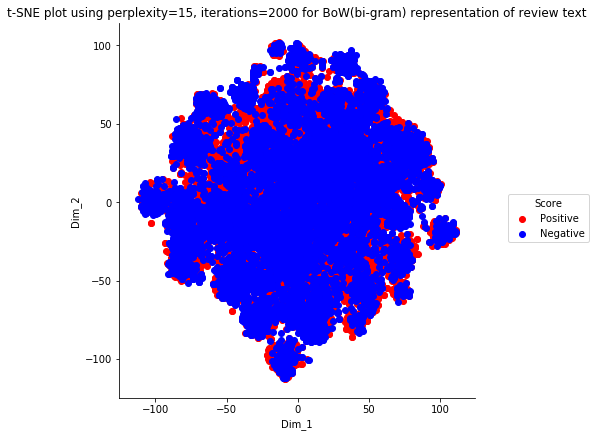

In [101]:
# t-SNE plotting using the dense representation obtained above

tsne = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=30)
tdata = tsne.fit_transform(std_data)

tdata = np.vstack((tdata.T, rev_data['Score'])).T
tdata = pd.DataFrame(data=tdata, columns=('Dim_1', 'Dim_2', 'Score'))

d={'color':['r','b']}
sns.FacetGrid(tdata, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot using perplexity=30, iterations=2000 for BoW(bi-gram) representation of review text')
plt.show()

## TFIDF Vectorizer

#### t-SNE plot using perplexity=15 and iterations=2000

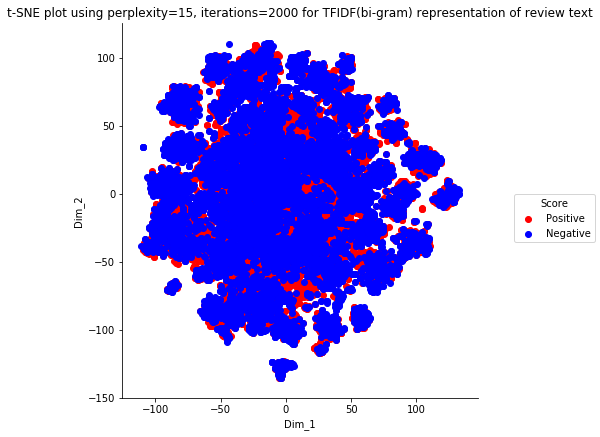

In [103]:
# Apply tfidf vectorizer to convert text to data
# Using only 10k postive and 10k negative reviews

tf_idf = TfidfVectorizer(ngram_range=(1,2))
tfidf_data = tf_idf.fit_transform(rev_data['CleanedText'].values)

# Convert the sparse representation into dense one by using TruncatedSVD

t_svd = TruncatedSVD(n_components=50, random_state=0)
dense_tfidf_data = t_svd.fit_transform(tfidf_data)

# Standardizing the data
std = StandardScaler()
std_data = std.fit_transform(dense_tfidf_data)

# t-SNE on standardized data

tsne = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=15)
tfidf_tsne = tsne.fit_transform(std_data)

tfidf_tsne = np.vstack((tfidf_tsne.T, rev_data['Score'])).T
tfidf_tsne = pd.DataFrame(data=tfidf_tsne, columns=('Dim_1', 'Dim_2', 'Score'))

d={'color':['r','b']}
sns.FacetGrid(tfidf_tsne, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot using perplexity=15, iterations=2000 for TFIDF(bi-gram) representation of review text')
plt.show()

#### t-SNE plot using perplexity=30 and iterations=2000

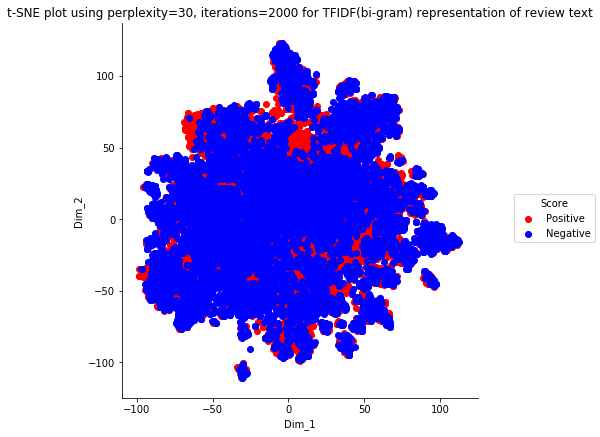

In [152]:
tsne = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=30)
tfidf_tsne_std = tsne.fit_transform(std_data)

tfidf_tsne_std = np.vstack((tfidf_tsne_std.T, rev_data['Score'])).T
tfidf_tsne_std = pd.DataFrame(data=tfidf_tsne_std, columns=('Dim_1', 'Dim_2', 'Score'))

d={'color':['r','b']}
sns.FacetGrid(tfidf_tsne_std, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot using perplexity=30, iterations=2000 for TFIDF(bi-gram) representation of review text')
plt.show()

## W2V

In [130]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


list_of_sent = []
for review in rev_data['CleanedText'].values:
    list_of_sent.append(review.split())

w2v = Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v.wv.vocab)

In [133]:
# Avg-Tfidf
from tqdm import tqdm

review_vectors = []
for review in tqdm(list_of_sent):
    nwords = 0
    rev_vec = np.zeros(50)
    for word in review:
        if word in w2v_words:
            vec = w2v.wv[word]
            rev_vec += vec
            nwords += 1
    if nwords != 0:
        rev_vec /= nwords
    review_vectors.append(rev_vec)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:25<00:00, 793.96it/s]


#### t-SNE plot using perplexity=30 and iterations=2000

In [143]:
t_svd = TruncatedSVD(n_components=20, random_state=0)
dense_avgw2v_data = t_svd.fit_transform(review_vectors)

std = StandardScaler()
std_data = std.fit_transform(dense_avgw2v_data)

In [144]:
tsne = TSNE(n_components=2, random_state=0, n_iter=2000)
avgw2v_tsne_std = tsne.fit_transform(std_data)

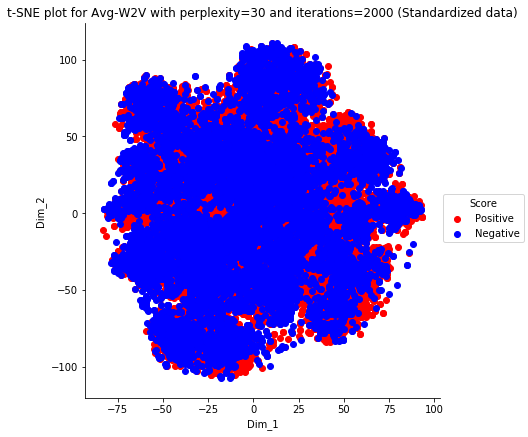

In [145]:
avgw2v_tsne_std = np.vstack((avgw2v_tsne_std.T, rev_data['Score'])).T
avgw2v_tsne_std = pd.DataFrame(data=avgw2v_tsne_std, columns=('Dim_1', 'Dim_2', 'Score'))

d={'color':['r','b']}
sns.FacetGrid(avgw2v_tsne_std, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot for Avg-W2V with perplexity=30 and iterations=2000 (Standardized data)')
plt.show()

# TFIDF - Weighted W2V

In [150]:
tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit_transform(rev_data['CleanedText'].values)

# Creating a dictionary with word as key and it's tfidf representation as value
dictionary = dict(zip(tfidf.get_feature_names(), list(tfidf.idf_)))

tfidf_words = tfidf.get_feature_names()

# review_vectors will store the tfidf-weighted W2V representation of the reviews in the dataset
review_vectors = []

row=0
for review in tqdm(list_of_sent): 
    rev_vec = np.zeros(50)
    weight_sum =0
    for word in review:
        if word in w2v_words:
            vec = w2v.wv[word]
            tf_idf = dictionary[word]*(review.count(word)/len(review))
            rev_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        rev_vec /= weight_sum
    review_vectors.append(rev_vec)
    row += 1

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:39<00:00, 511.79it/s]


#### t-SNE plot using perplexity=30 and iterations=2000

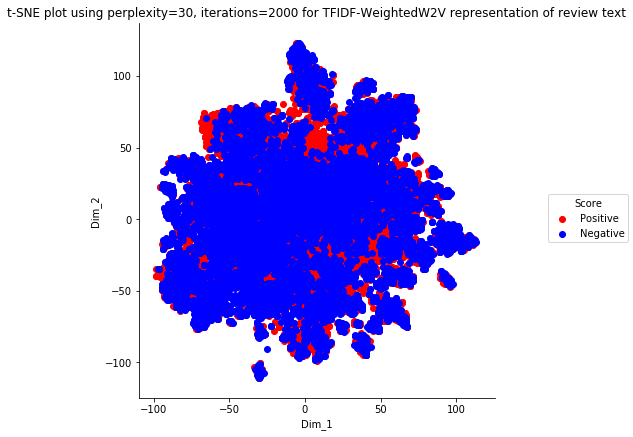

In [151]:
t_svd = TruncatedSVD(n_components=20, random_state=0)
dense_tdidfw2v_data = t_svd.fit_transform(review_vectors)

std = StandardScaler()
std_data = std.fit_transform(dense_tdidfw2v_data)

tsne = TSNE(n_components=2, random_state=0, n_iter=2000)
tfidfw2v_tsne_std = tsne.fit_transform(std_data)

tfidfw2v_tsne_std = np.vstack((tfidfw2v_tsne_std.T, rev_data['Score'])).T
tfidfw2v_tsne_std = pd.DataFrame(data=tfidfw2v_tsne_std, columns=('Dim_1', 'Dim_2', 'Score'))

d={'color':['r','b']}
sns.FacetGrid(tfidfw2v_tsne_std, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('t-SNE plot using perplexity=30, iterations=2000 for TFIDF-WeightedW2V representation of review text')
plt.show()

# OBSERVATIONS

t-SNE data was plotted for reviews using various word to vector representation techniques.
Following are some of the observations made
1. t-SNE plots based on polarity of review show considerable overlap irrespective of word to vector conversion technique used.

2. Perplexity 15 shows better segregation of points compared to default perplexity value on a set of 20k reviews.

3. Word to vector conversion techniques return sparse matrix representation and TruncatedSVD was used to convert it to a dense representation. n_components parameter in SVD makes a difference as higher values than 2 ensure better segregation of data on t-SNE plot.